# **Notebook 6: Regression with Cleaned and Transformed Dataset**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

## Change working directory

In [440]:
import os

# Get the current directory
current_dir = os.getcwd()
print("Current Directory:", current_dir)

# Change the directory to the new path
os.chdir('/workspace/milestone-project-housing-issues')

# Get the updated current directory
current_dir = os.getcwd()
print("New Current Directory:", current_dir)

Current Directory: /workspace/milestone-project-housing-issues
New Current Directory: /workspace/milestone-project-housing-issues


## Load dataset

### Load TrainSetTransformed

In [441]:
import pandas as pd
trainset_transformed = pd.read_csv('/workspace/milestone-project-housing-issues/outputs/datasets/cleaned/TrainSetTransformed.csv')
print(trainset_transformed.shape)
trainset_transformed.head()

(1168, 19)


,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearRemodAdd,SalePrice
0,984.0,3,0,15.937006,0,40.624672,34.732831,0,42.755117,0,11694.0,90.0,21.260292,4.977715,0,0,1822.0,2007,314813
1,720.0,2,1,69.279335,1,31.466463,23.053045,1,29.899833,1,6600.0,60.0,25.536738,4.242568,0,1,894.0,1962,109500
2,840.0,2,1,90.580158,2,15.356688,26.839552,0,31.048349,1,13360.0,80.0,15.099669,5.492862,1,1,876.0,2006,163500
3,676.0,3,1,126.511219,0,21.341597,36.315495,2,41.097445,0,13265.0,80.0,12.165525,4.300525,0,2,1568.0,2002,271000
4,806.0,3,1,110.906783,1,39.203404,36.055097,2,39.255573,0,13704.0,113.0,12.247449,4.654167,0,3,1541.0,2002,205000


In [442]:
trainset_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2ndFlrSF      1168 non-null   float64
 1   BedroomAbvGr  1168 non-null   int64  
 2   BsmtExposure  1168 non-null   int64  
 3   BsmtFinSF1    1168 non-null   float64
 4   BsmtFinType1  1168 non-null   int64  
 5   BsmtUnfSF     1168 non-null   float64
 6   GarageArea    1168 non-null   float64
 7   GarageFinish  1168 non-null   int64  
 8   GrLivArea     1168 non-null   float64
 9   KitchenQual   1168 non-null   int64  
 10  LotArea       1168 non-null   float64
 11  LotFrontage   1168 non-null   float64
 12  MasVnrArea    1168 non-null   float64
 13  OpenPorchSF   1168 non-null   float64
 14  OverallCond   1168 non-null   int64  
 15  OverallQual   1168 non-null   int64  
 16  TotalBsmtSF   1168 non-null   float64
 17  YearRemodAdd  1168 non-null   int64  
 18  SalePrice     1168 non-null 

In [443]:
missing_values_count = trainset_transformed.isna().sum()
missing_values_count

2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearRemodAdd    0
SalePrice       0
dtype: int64

### Load TestSetTransformed

In [444]:
import pandas as pd

testset_transformed = pd.read_csv('/workspace/milestone-project-housing-issues/outputs/datasets/cleaned/TestSetTransformed.csv')
print(testset_transformed.shape)
testset_transformed.head()

(292, 19)


,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearRemodAdd,SalePrice
0,892.000,4,1,126.575860,3,30.317045,28.233895,1,50.149776,1,17695.875,88.000,22.978251,2.939703,4,4,2035.0,1975,200624
1,620.000,3,1,63.310138,6,18.107132,20.578416,0,39.724048,3,9490.000,79.000,18.384776,5.096815,1,4,806.0,1980,133000
2,247.625,3,1,38.616805,5,25.266650,24.485212,0,34.684290,0,7015.000,106.000,12.688578,3.724104,6,1,709.0,2008,110000
3,866.000,4,1,62.215089,6,29.575211,28.771824,1,44.966654,1,10005.000,83.000,17.291616,5.068166,0,3,1160.0,1977,192000
4,762.000,3,1,96.578176,1,25.286640,21.494186,0,33.045423,1,1680.000,29.625,19.519221,3.218082,0,4,525.0,1971,88000


In [445]:
testset_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2ndFlrSF      292 non-null    float64
 1   BedroomAbvGr  292 non-null    int64  
 2   BsmtExposure  292 non-null    int64  
 3   BsmtFinSF1    292 non-null    float64
 4   BsmtFinType1  292 non-null    int64  
 5   BsmtUnfSF     292 non-null    float64
 6   GarageArea    292 non-null    float64
 7   GarageFinish  292 non-null    int64  
 8   GrLivArea     292 non-null    float64
 9   KitchenQual   292 non-null    int64  
 10  LotArea       292 non-null    float64
 11  LotFrontage   292 non-null    float64
 12  MasVnrArea    292 non-null    float64
 13  OpenPorchSF   292 non-null    float64
 14  OverallCond   292 non-null    int64  
 15  OverallQual   292 non-null    int64  
 16  TotalBsmtSF   292 non-null    float64
 17  YearRemodAdd  292 non-null    int64  
 18  SalePrice     292 non-null    

In [446]:
missing_values_count = testset_transformed.isna().sum()
missing_values_count

2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearRemodAdd    0
SalePrice       0
dtype: int64

---

### Combining trainset_transformed and testset_transform to enable fresh split into train and test sets

In [447]:
import pandas as pd

# Combine the two datasets row-wise
combined_df = pd.concat([trainset_transformed, testset_transformed], ignore_index=True)

# Check the combined dataframe
print(combined_df.shape)
print(combined_df.head())

(1460, 19)
   2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  BsmtUnfSF  \
0     984.0             3             0   15.937006             0  40.624672   
1     720.0             2             1   69.279335             1  31.466463   
2     840.0             2             1   90.580158             2  15.356688   
3     676.0             3             1  126.511219             0  21.341597   
4     806.0             3             1  110.906783             1  39.203404   

   GarageArea  GarageFinish  GrLivArea  KitchenQual  LotArea  LotFrontage  \
0   34.732831             0  42.755117            0  11694.0         90.0   
1   23.053045             1  29.899833            1   6600.0         60.0   
2   26.839552             0  31.048349            1  13360.0         80.0   
3   36.315495             2  41.097445            0  13265.0         80.0   
4   36.055097             2  39.255573            0  13704.0        113.0   

   MasVnrArea  OpenPorchSF  OverallCond  Over

---

## ML Pipeline: Regressor with transformed dataset

In [448]:
from sklearn.pipeline import Pipeline

# Feature Engineering
from feature_engine.encoding import OrdinalEncoder
from feature_engine.selection import SmartCorrelatedSelection

# Feat Scaling
from sklearn.preprocessing import StandardScaler

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML algorithms
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor


def PipelineOptimization(model):

    pipeline_base = Pipeline([

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
         method="spearman", threshold=0.6, selection_method="variance")),

        ("feat_scaling", StandardScaler()),

        ("feat_selection", SelectFromModel(model)),

        ("model", model),
    ])
    return pipeline_base

---

## Hyperparameter Optimisation

In [449]:
from sklearn.model_selection import GridSearchCV


class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model = PipelineOptimization(self.models[key])

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring)
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score',
                   'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches

### Split Train - Test Set

In [450]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    combined_df.drop(['SalePrice'], axis=1),
    combined_df['SalePrice'],
    test_size=0.2,
    random_state=0
)

print("* Train set:", X_train.shape, y_train.shape,
      "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (1168, 18) (1168,) 
* Test set: (292, 18) (292,)


In [451]:
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(X_train, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Grid Search CV -Sklearn

In [452]:
models_quick_search = {
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "AdaBoostRegressor": AdaBoostRegressor(random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0),
    "XGBRegressor": XGBRegressor(random_state=0),
    'LinearRegression': LinearRegression(),
}

params_quick_search = {
    'LinearRegression': {},
    'DecisionTreeRegressor': {},
    'RandomForestRegressor': {},
    'ExtraTreesRegressor': {},
    'AdaBoostRegressor': {},
    'GradientBoostingRegressor': {},
    'XGBRegressor': {}
}

In [453]:
search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.In


Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [454]:
import numpy as np

grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
2,ExtraTreesRegressor,0.650928,0.739768,0.793613,0.052369
5,XGBRegressor,0.61659,0.730256,0.78375,0.059229
4,GradientBoostingRegressor,0.654643,0.712853,0.75205,0.033584
1,RandomForestRegressor,0.629021,0.711619,0.748996,0.043748
6,LinearRegression,0.650385,0.687289,0.721194,0.02458
3,AdaBoostRegressor,0.534435,0.660016,0.764676,0.079919
0,DecisionTreeRegressor,0.250552,0.480987,0.656747,0.135388


### Search for most suitable model to find the best hyperparameters

In [455]:
models_search_regressor = {
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
}

params_search_regressor = {
    "ExtraTreesRegressor": {
        'model__n_estimators': [100, 300],  # Number of trees
        'model__max_depth': [3, 10, None],  # Maximum depth of each tree
        'model__min_samples_split': [2, 5],  # Minimum samples required to split a node
        'model__min_samples_leaf': [1, 4],  # Minimum samples required at a leaf node
        'model__max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    }
}

params_quick_search_regressor = {
    'ExtraTreesRegressor': {
        'model__n_estimators': [100, 300],  # Number of trees
        'model__max_depth': [3, 10, None],  # Maximum depth of each tree
        'model__min_samples_split': [2, 5],  # Minimum samples required to split a node
        'model__min_samples_leaf': [1, 4],  # Minimum samples required at a leaf node
        'model__max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    },
}


In [456]:
search = HyperparameterOptimizationSearch(models=models_search_regressor, params=params_search_regressor)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [457]:
grid_search_summary_regressor, grid_search_pipelines_regressor = search.score_summary(sort_by='mean_score')
grid_search_summary_regressor

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__max_features,model__min_samples_leaf,model__min_samples_split,model__n_estimators
43,ExtraTreesRegressor,0.708693,0.772354,0.815299,0.035735,None,sqrt,1,5,300
22,ExtraTreesRegressor,0.725204,0.769879,0.803064,0.028348,10,auto,4,5,100
20,ExtraTreesRegressor,0.725204,0.769879,0.803064,0.028348,10,auto,4,2,100
38,ExtraTreesRegressor,0.721921,0.769381,0.799946,0.027526,None,auto,4,5,100
36,ExtraTreesRegressor,0.721921,0.769381,0.799946,0.027526,None,auto,4,2,100
27,ExtraTreesRegressor,0.701051,0.769257,0.81009,0.038261,10,sqrt,1,5,300
21,ExtraTreesRegressor,0.7272,0.76905,0.802941,0.027702,10,auto,4,2,300
23,ExtraTreesRegressor,0.7272,0.76905,0.802941,0.027702,10,auto,4,5,300
42,ExtraTreesRegressor,0.708604,0.768323,0.811245,0.034416,None,sqrt,1,5,100
39,ExtraTreesRegressor,0.723952,0.768068,0.801806,0.027646,None,auto,4,5,300


---

### Best model and hyperparameters

In [458]:
best_model_regressor = grid_search_summary_regressor.iloc[0, 0]
best_model_regressor

'ExtraTreesRegressor'

In [459]:
for model, gs in grid_search_pipelines_regressor.items():
    print(f"Model: {model}")
    print(f"Best score: {gs.best_score_}")
    print(f"Best params: {gs.best_params_}")

Model: ExtraTreesRegressor
Best score: 0.772353761509185
Best params: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 300}


In [460]:
best_params_regressor = grid_search_pipelines_regressor[best_model_regressor].best_params_
best_params_regressor

{'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 5,
 'model__n_estimators': 300}

#### Best regressor pipeline

In [461]:
best_regressor_pipeline = grid_search_pipelines_regressor[best_model_regressor].best_estimator_
best_regressor_pipeline

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['2ndFlrSF', 'BedroomAbvGr',
                                                     'BsmtExposure',
                                                     'BsmtFinSF1',
                                                     'BsmtFinType1',
                                                     'BsmtUnfSF', 'GarageArea',
                                                     'GarageFinish',
                                                     'GrLivArea', 'KitchenQual',
                                                     'LotArea', 'LotFrontage',
                                                     'MasVnrArea',
                                                     'OpenPorchSF',
                                    

---

### Assessing Feature Importance

* These are the 4 most important features in descending order. The model was trained on them: 
['GrLivArea', 'TotalBsmtSF', 'KitchenQual', 'GarageArea']


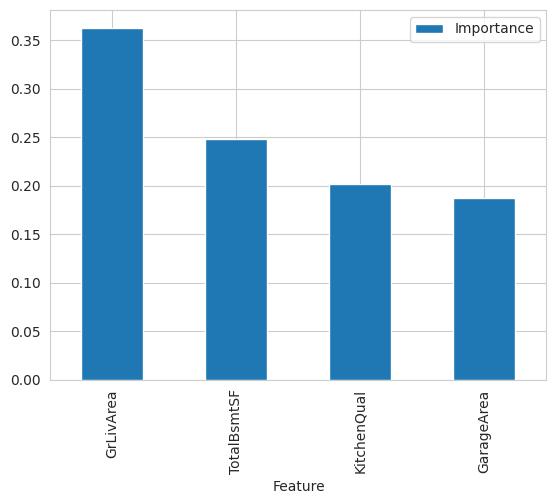

In [462]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('whitegrid')

data_cleaning_feat_eng_steps = 2

# Transforming the X_train using the steps before model selection
pipeline_steps_before_model = Pipeline(best_regressor_pipeline.steps[:data_cleaning_feat_eng_steps])
X_transformed = pipeline_steps_before_model.transform(X_train)

# Convert the transformed data back into a DataFrame to retain column names
columns_after_data_cleaning_feat_eng = pd.DataFrame(X_transformed, columns=X_train.columns)

# Get the most important features from the feature selection step
best_features = columns_after_data_cleaning_feat_eng.columns[best_regressor_pipeline['feat_selection'].get_support()].to_list()

# Create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame({
    'Feature': best_features,
    'Importance': best_regressor_pipeline['model'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

# Plot the feature importance
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()


---

## Evaluate on Train and Test Sets

In [463]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)


def regression_evaluation(X, y, pipeline):
    prediction = pipeline.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(
        mean_squared_error(y, prediction)).round(3))
    print("\n")


def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")

    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")

    plt.show()

Model Evaluation 

* Train Set
R2 Score: 0.939
Mean Absolute Error: 12326.223
Mean Squared Error: 397149102.088
Root Mean Squared Error: 19928.6


* Test Set
R2 Score: 0.728
Mean Absolute Error: 23669.673
Mean Squared Error: 1452204345.721
Root Mean Squared Error: 38107.799




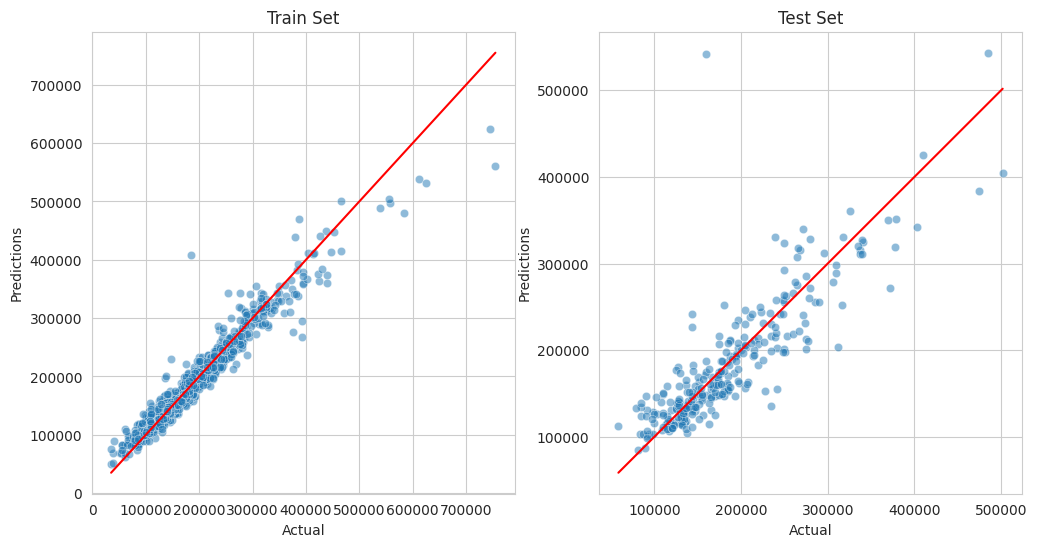

In [464]:
regression_performance(X_train, y_train, X_test, y_test, best_regressor_pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, best_regressor_pipeline)

---

# Regressor with PCA

In [465]:
import pandas as pd

# Combine the two datasets row-wise
df_for_pca = pd.concat([trainset_transformed, testset_transformed], ignore_index=True)

# Check the combined dataframe
df_for_pca.info

<bound method DataFrame.info of       2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0      984.000             3             0   15.937006             0   
1      720.000             2             1   69.279335             1   
2      840.000             2             1   90.580158             2   
3      676.000             3             1  126.511219             0   
4      806.000             3             1  110.906783             1   
...        ...           ...           ...         ...           ...   
1455  1336.625             1             2  147.190986             0   
1456   793.000             2             2  147.190986             0   
1457   862.000             5             1   36.302152             3   
1458   670.000             2             1   50.289647             5   
1459   530.000             3             1   78.643228             1   

      BsmtUnfSF  GarageArea  GarageFinish  GrLivArea  KitchenQual  LotArea  \
0     40.624672   34.7328

In [466]:
pipeline = PipelineOptimization(model=LinearRegression())
pipeline_pca = Pipeline(pipeline.steps[:3])
df_pca = pipeline_pca.fit(X_train, y_train).transform(X_train)

print(df_pca.shape,'\n', type(df_pca))

(1168, 6) 
 <class 'numpy.ndarray'>


#### Applying PCA to the scaled data

* The 6 components explain 100.0% of the data 



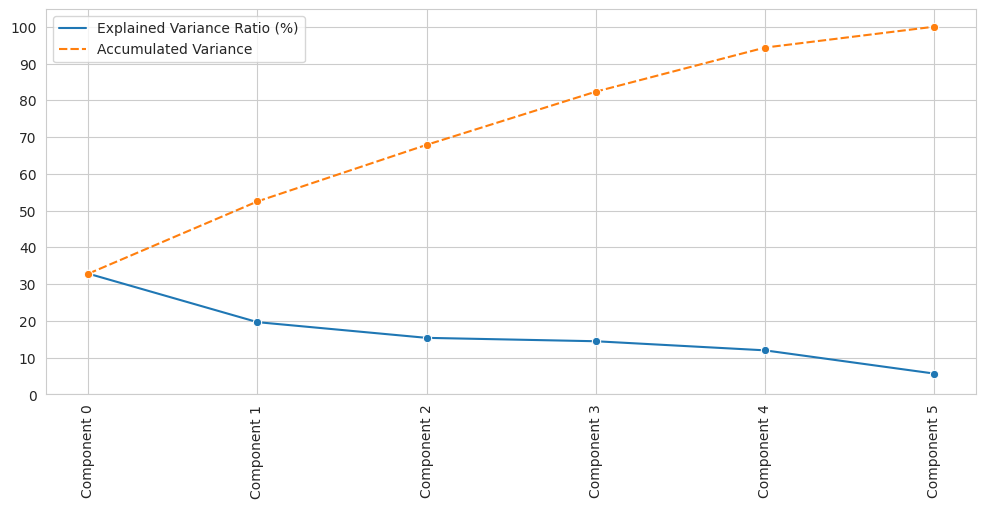

In [467]:
import numpy as np
from sklearn.decomposition import PCA

n_components = 6


def pca_components_analysis(df_pca, n_components):
    pca = PCA(n_components=n_components).fit(df_pca)
    x_PCA = pca.transform(df_pca)  # array with transformed PCA

    ComponentsList = ["Component " + str(number)
                      for number in range(n_components)]
    dfExplVarRatio = pd.DataFrame(
        data=np.round(100 * pca.explained_variance_ratio_, 3),
        index=ComponentsList,
        columns=['Explained Variance Ratio (%)'])

    dfExplVarRatio['Accumulated Variance'] = dfExplVarRatio['Explained Variance Ratio (%)'].cumsum(
    )

    PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum(
    )

    print(
        f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=dfExplVarRatio,  marker="o")
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0, 110, 10))
    plt.show()


pca_components_analysis(df_pca=df_pca, n_components=n_components)

* The 4 components explain 82.33% of the data 



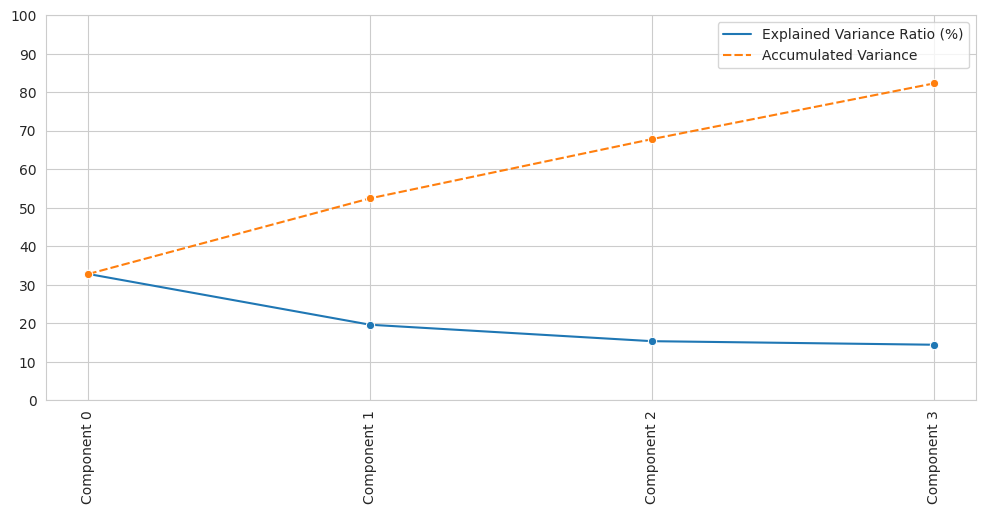

In [468]:
n_components = 4
pca_components_analysis(df_pca=df_pca, n_components=n_components)

### Rewrite ML Pipeline for Modelling

In [469]:
from sklearn.decomposition import PCA


def PipelineOptimization(model):
    pipeline_base = Pipeline([

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
         method="spearman", threshold=0.6, selection_method="variance")),

        ("feat_scaling", StandardScaler()),

        # PCA replace Feature Selection
        ("PCA", PCA(n_components=9, random_state=0)),

        ("feat_selection", SelectFromModel(model)),

        ("model", model),

    ])

    return pipeline_base

In [470]:
print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (1168, 18) (1168,) 
* Test set: (292, 18) (292,)


In [471]:
models_quick_search = {
    'LinearRegression': LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "AdaBoostRegressor": AdaBoostRegressor(random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0),
    "XGBRegressor": XGBRegressor(random_state=0),
}

params_quick_search = {
    'LinearRegression': {},
    'DecisionTreeRegressor': {},
    'RandomForestRegressor': {},
    'ExtraTreesRegressor': {},
    'AdaBoostRegressor': {},
    'GradientBoostingRegressor': {},
    'XGBRegressor': {}
}


In [472]:
quick_search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
quick_search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.In

In [473]:
grid_search_summary, grid_search_pipelines = quick_search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
4,AdaBoostRegressor,0.452402,0.629149,0.764083,0.102402
5,GradientBoostingRegressor,0.440266,0.621056,0.755384,0.10588
0,LinearRegression,0.581648,0.612429,0.643604,0.023457
6,XGBRegressor,0.347344,0.523257,0.684136,0.118701
2,RandomForestRegressor,0.358544,0.516308,0.682112,0.112943
3,ExtraTreesRegressor,0.308518,0.440841,0.620385,0.116733
1,DecisionTreeRegressor,0.188725,0.3606,0.544712,0.135678


### Extensive search on the most suitable model to find the best hyperparameters

In [474]:
models_search_pca = {
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
}

params_search_pca = {
    "ExtraTreesRegressor": {
        'model__n_estimators': [100, 300],  # Number of trees
        'model__max_depth': [3, 10, None],  # Maximum depth of each tree
        'model__min_samples_split': [2, 5],  # Minimum samples required to split a node
        'model__min_samples_leaf': [1, 4],  # Minimum samples required at a leaf node
        'model__max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    }
}

params_quick_search_pca = {
    "ExtraTreesRegressor": {
        'model__n_estimators': [100, 300],  # Number of trees
        'model__max_depth': [3, 10, None],  # Maximum depth of each tree
        'model__min_samples_split': [2, 5],  # Minimum samples required to split a node
        'model__min_samples_leaf': [1, 4],  # Minimum samples required at a leaf node
        'model__max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    }
}

In [475]:
search = HyperparameterOptimizationSearch(models=models_search_pca, params=params_search_pca)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [476]:
grid_search_summary_pca, grid_search_pipelines_pca = search.score_summary(sort_by='mean_score')
grid_search_summary_pca

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__max_features,model__min_samples_leaf,model__min_samples_split,model__n_estimators
31,ExtraTreesRegressor,0.633461,0.643823,0.662022,0.010691,10,sqrt,4,5,300
29,ExtraTreesRegressor,0.633461,0.643823,0.662022,0.010691,10,sqrt,4,2,300
23,ExtraTreesRegressor,0.633461,0.643823,0.662022,0.010691,10,auto,4,5,300
21,ExtraTreesRegressor,0.633461,0.643823,0.662022,0.010691,10,auto,4,2,300
47,ExtraTreesRegressor,0.629744,0.641625,0.658688,0.01139,None,sqrt,4,5,300
45,ExtraTreesRegressor,0.629744,0.641625,0.658688,0.01139,None,sqrt,4,2,300
39,ExtraTreesRegressor,0.629744,0.641625,0.658688,0.01139,None,auto,4,5,300
37,ExtraTreesRegressor,0.629744,0.641625,0.658688,0.01139,None,auto,4,2,300
46,ExtraTreesRegressor,0.63211,0.639562,0.664446,0.012495,None,sqrt,4,5,100
44,ExtraTreesRegressor,0.63211,0.639562,0.664446,0.012495,None,sqrt,4,2,100


### Best model and hyperparameters:

In [477]:
best_model_pca = grid_search_summary_pca.iloc[0,0]
best_model_pca

'ExtraTreesRegressor'

In [478]:
best_params_pca = grid_search_pipelines_pca[best_model_pca].best_params_
best_params_pca

{'model__max_depth': 10,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 2,
 'model__n_estimators': 300}

In [479]:
best_pca_pipeline = grid_search_pipelines_pca[best_model_pca].best_estimator_
best_pca_pipeline

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['2ndFlrSF', 'BedroomAbvGr',
                                                     'BsmtExposure',
                                                     'BsmtFinSF1',
                                                     'BsmtFinType1',
                                                     'BsmtUnfSF', 'GarageArea',
                                                     'GarageFinish',
                                                     'GrLivArea', 'KitchenQual',
                                                     'LotArea', 'LotFrontage',
                                                     'MasVnrArea',
                                                     'OpenPorchSF',
                                    

## Evaluating Regressor on Train and Tests Sets

Model Evaluation 

* Train Set
R2 Score: 0.696
Mean Absolute Error: 29844.277
Mean Squared Error: 1987879417.238
Root Mean Squared Error: 44585.641


* Test Set
R2 Score: 0.623
Mean Absolute Error: 30697.959
Mean Squared Error: 2015269516.807
Root Mean Squared Error: 44891.753




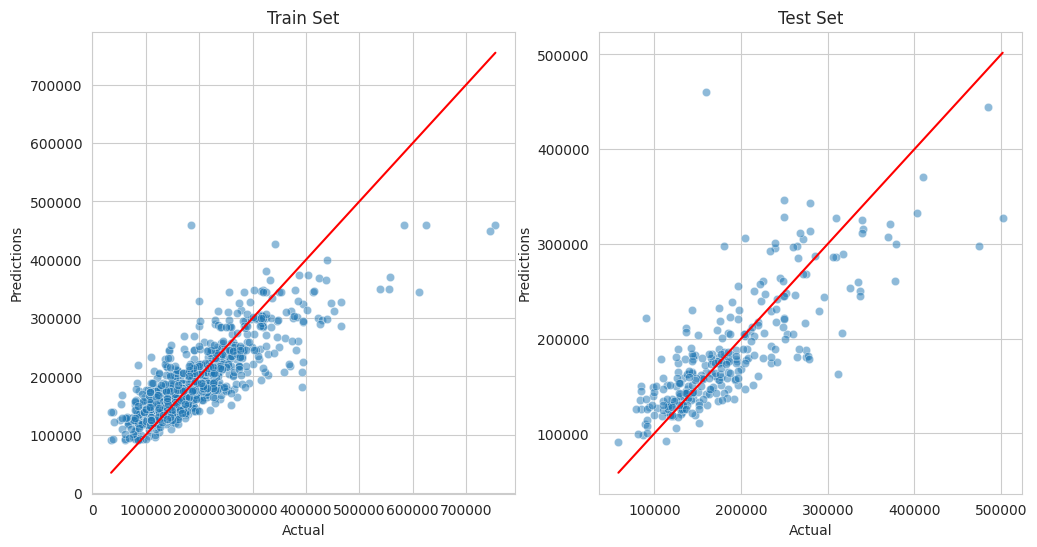

In [480]:
regression_performance(X_train, y_train, X_test, y_test, best_pca_pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test,
                            best_pca_pipeline)

#  Regression Analysis with Categorical Target Variable

### Convert numerical target to bins

* The classes represent the following ranges: 
{'SalePrice': [-inf, 129975.0, 163000.0, 214000.0, inf]} 



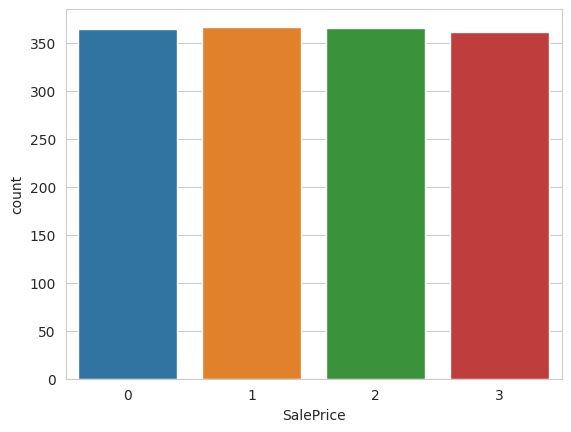

In [481]:
from feature_engine.discretisation import EqualFrequencyDiscretiser
disc = EqualFrequencyDiscretiser(q=4, variables=['SalePrice'])  # we will try q as 2, and 3
df_clf = disc.fit_transform(combined_df)

print(f"* The classes represent the following ranges: \n{disc.binner_dict_} \n")
sns.countplot(data=df_clf, x='SalePrice')
plt.show()

In [482]:
df_clf.head(3)

,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearRemodAdd,SalePrice
0,984.0,3,0,15.937006,0,40.624672,34.732831,0,42.755117,0,11694.0,90.0,21.260292,4.977715,0,0,1822.0,2007,3
1,720.0,2,1,69.279335,1,31.466463,23.053045,1,29.899833,1,6600.0,60.0,25.536738,4.242568,0,1,894.0,1962,0
2,840.0,2,1,90.580158,2,15.356688,26.839552,0,31.048349,1,13360.0,80.0,15.099669,5.492862,1,1,876.0,2006,2


### Rewriting ML Pipeline for modelling

In [483]:
def PipelineOptimization(model):
    pipeline_base = Pipeline([

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
         method="spearman", threshold=0.6, selection_method="variance")),

        ("feat_scaling", StandardScaler()),

        ("feat_selection",  SelectFromModel(model)),

        ("model", model),

    ])

    return pipeline_base

#### Algorithms for classification

In [484]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

### Splitting Train and Test Sets

In [485]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clf.drop(['SalePrice'], axis=1),
    df_clf['SalePrice'],
    test_size=0.2,
    random_state=0
)

print("* Train set:", X_train.shape, y_train.shape,
      "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (1168, 18) (1168,) 
* Test set: (292, 18) (292,)


In [486]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 618 to 684
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2ndFlrSF      1168 non-null   float64
 1   BedroomAbvGr  1168 non-null   int64  
 2   BsmtExposure  1168 non-null   int64  
 3   BsmtFinSF1    1168 non-null   float64
 4   BsmtFinType1  1168 non-null   int64  
 5   BsmtUnfSF     1168 non-null   float64
 6   GarageArea    1168 non-null   float64
 7   GarageFinish  1168 non-null   int64  
 8   GrLivArea     1168 non-null   float64
 9   KitchenQual   1168 non-null   int64  
 10  LotArea       1168 non-null   float64
 11  LotFrontage   1168 non-null   float64
 12  MasVnrArea    1168 non-null   float64
 13  OpenPorchSF   1168 non-null   float64
 14  OverallCond   1168 non-null   int64  
 15  OverallQual   1168 non-null   int64  
 16  TotalBsmtSF   1168 non-null   float64
 17  YearRemodAdd  1168 non-null   int64  
dtypes: float64(10), int64(8)
me

## Grid Seach CV – Sklearn

In [487]:
models_quick_search = {
    "XGBClassifier": XGBClassifier(random_state=0),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=0),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=0),
}

params_quick_search = {
    "XGBClassifier":{},
    "DecisionTreeClassifier":{},
    "RandomForestClassifier":{},
    "GradientBoostingClassifier":{},
    "ExtraTreesClassifier":{},
    "AdaBoostClassifier":{},
}

In [488]:
search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for XGBClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.In

In [417]:
grid_search_summary, grid_search_pipelines = quick_search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
4,AdaBoostRegressor,0.452402,0.629149,0.764083,0.102402
5,GradientBoostingRegressor,0.440266,0.621056,0.755384,0.10588
0,LinearRegression,0.581648,0.612429,0.643604,0.023457
6,XGBRegressor,0.347344,0.523257,0.684136,0.118701
2,RandomForestRegressor,0.358544,0.516308,0.682112,0.112943
3,ExtraTreesRegressor,0.308518,0.440841,0.620385,0.116733
1,DecisionTreeRegressor,0.188725,0.3606,0.544712,0.135678


### Extensive search on hyperparameters

In [418]:
models_search_clf = {
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
}

params_search_clf = {
    "ExtraTreesRegressor": {
        'model__n_estimators': [100, 300],  # Number of trees
        'model__max_depth': [3, 10, None],  # Maximum depth of each tree
        'model__min_samples_split': [2, 5],  # Minimum samples required to split a node
        'model__min_samples_leaf': [1, 4],  # Minimum samples required at a leaf node
        'model__max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    }
}

In [419]:
search = HyperparameterOptimizationSearch(models=models_search_clf, params=params_search_clf)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [420]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__max_features,model__min_samples_leaf,model__min_samples_split,model__n_estimators
19,ExtraTreesRegressor,0.685536,0.757108,0.780201,0.03613,10,auto,1,5,300
18,ExtraTreesRegressor,0.687397,0.756321,0.778707,0.034891,10,auto,1,5,100
17,ExtraTreesRegressor,0.680979,0.754868,0.777658,0.037165,10,auto,1,2,300
24,ExtraTreesRegressor,0.691266,0.754147,0.781485,0.032147,10,sqrt,1,2,100
25,ExtraTreesRegressor,0.69464,0.753623,0.78229,0.030547,10,sqrt,1,2,300
43,ExtraTreesRegressor,0.691354,0.753393,0.777532,0.032312,None,sqrt,1,5,300
39,ExtraTreesRegressor,0.692828,0.753123,0.781852,0.032161,None,auto,4,5,300
37,ExtraTreesRegressor,0.692828,0.753123,0.781852,0.032161,None,auto,4,2,300
16,ExtraTreesRegressor,0.676659,0.753055,0.775224,0.038414,10,auto,1,2,100
42,ExtraTreesRegressor,0.694429,0.752927,0.77661,0.030904,None,sqrt,1,5,100


### Best model and hyperparameters

In [421]:
best_model_clf = grid_search_summary.iloc[0,0]
best_model_clf

'ExtraTreesRegressor'

In [422]:
best_params_clf = grid_search_pipelines[best_model_clf].best_params_
best_params_clf

{'model__max_depth': 10,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 5,
 'model__n_estimators': 300}

In [423]:
pipeline_clf = grid_search_pipelines[best_model_clf].best_estimator_
pipeline_clf

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['2ndFlrSF', 'BedroomAbvGr',
                                                     'BsmtExposure',
                                                     'BsmtFinSF1',
                                                     'BsmtFinType1',
                                                     'BsmtUnfSF', 'GarageArea',
                                                     'GarageFinish',
                                                     'GrLivArea', 'KitchenQual',
                                                     'LotArea', 'LotFrontage',
                                                     'MasVnrArea',
                                                     'OpenPorchSF',
                                    

### Assessing feature importance

* These are the 5 most important features in descending order. The model was trained on them: 
['GrLivArea', 'KitchenQual', 'TotalBsmtSF', 'GarageArea', 'GarageFinish']


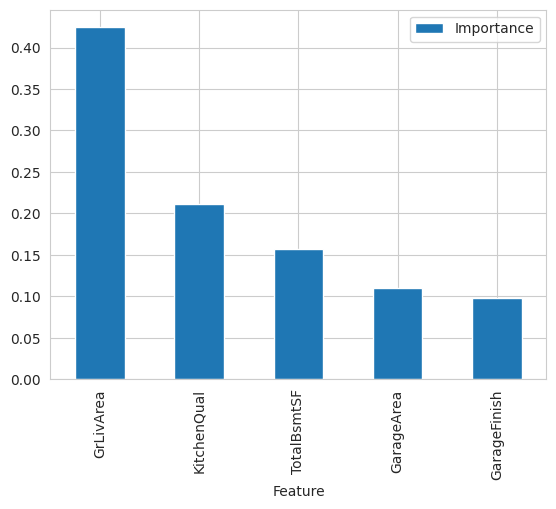

In [424]:
# after data cleaning and feature engineering, the feature space may change
data_cleaning_feat_eng_steps = 2

# Transform X_train with the first steps of the pipeline and convert the result back to a DataFrame
transformed_data = Pipeline(pipeline_clf.steps[:data_cleaning_feat_eng_steps]).transform(X_train)

# Convert transformed data back to a DataFrame and retain the original column names
columns_after_data_cleaning_feat_eng = pd.DataFrame(transformed_data, columns=X_train.columns)

# Select the best features after feature selection
best_features = columns_after_data_cleaning_feat_eng.columns[
    pipeline_clf['feat_selection'].get_support()
].to_list()

# Create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame(data={
    'Feature': best_features,
    'Importance': pipeline_clf['model'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Reassign best features in order
best_features = df_feature_importance['Feature'].to_list()

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{best_features}")

# Plot feature importance
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

## Evaluate regressor with categorical target on train and test sets

In [425]:
disc.binner_dict_['SalePrice']

[-inf, 129975.0, 163000.0, 214000.0, inf]

In [426]:
label_map = ['129,975 and under', '129,975 to 163,000', '163,000 to 214,000', '214,000 and over']
label_map

['129,975 and under',
 '129,975 to 163,000',
 '163,000 to 214,000',
 '214,000 and over']

In [427]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 618 to 684
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2ndFlrSF      1168 non-null   float64
 1   BedroomAbvGr  1168 non-null   int64  
 2   BsmtExposure  1168 non-null   int64  
 3   BsmtFinSF1    1168 non-null   float64
 4   BsmtFinType1  1168 non-null   int64  
 5   BsmtUnfSF     1168 non-null   float64
 6   GarageArea    1168 non-null   float64
 7   GarageFinish  1168 non-null   int64  
 8   GrLivArea     1168 non-null   float64
 9   KitchenQual   1168 non-null   int64  
 10  LotArea       1168 non-null   float64
 11  LotFrontage   1168 non-null   float64
 12  MasVnrArea    1168 non-null   float64
 13  OpenPorchSF   1168 non-null   float64
 14  OverallCond   1168 non-null   int64  
 15  OverallQual   1168 non-null   int64  
 16  TotalBsmtSF   1168 non-null   float64
 17  YearRemodAdd  1168 non-null   int64  
dtypes: float64(10), int64(8)
me

Model Evaluation 

* Train Set
R2 Score: 0.901
Mean Absolute Error: 0.256
Mean Squared Error: 0.124
Root Mean Squared Error: 0.353


* Test Set
R2 Score: 0.722
Mean Absolute Error: 0.436
Mean Squared Error: 0.335
Root Mean Squared Error: 0.579




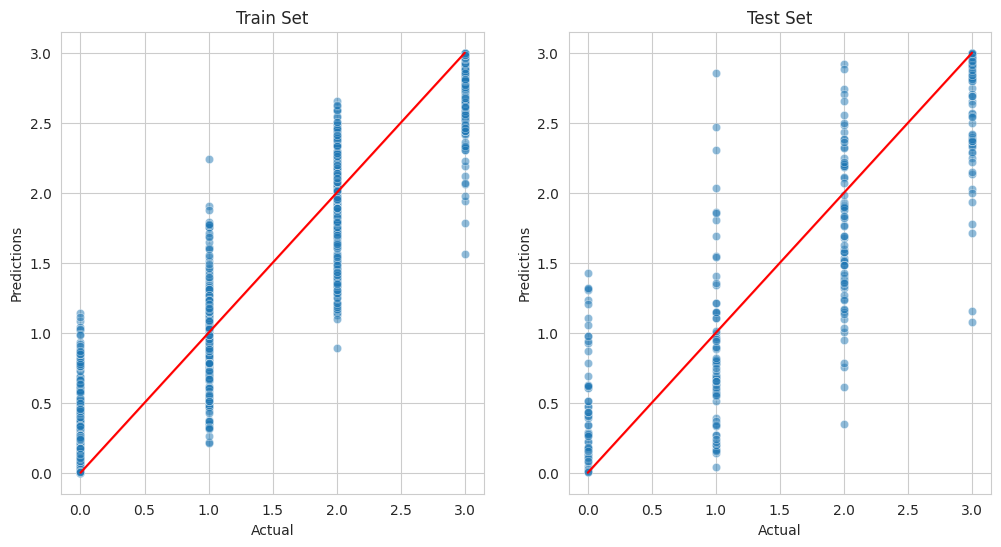

In [428]:
regression_performance(X_train, y_train, X_test, y_test, pipeline_clf)
regression_evaluation_plots(X_train, y_train, X_test, y_test,
                            pipeline_clf)

---

# Best pipeline for use with Transformed Dataset

We fitted 3 pipelines fitted:
* Regression
* Regression with PCA
* Classifier

The best pipeline for the Transformed dataset is the Regressor with Principal Component Analysis (PCA), which had an R2 score of 0.92 for the Train Set and 0.78 for the Test Set.

As the PCA inherently works with the principal (most important) features in the dataset, the best features cannot be separately identified, and as a result no final model with the best features is possible. The final performance for the model with the transformed dataset is therefore as for the PCA pipeline.

In [429]:
best_pca_pipeline

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['2ndFlrSF', 'BedroomAbvGr',
                                                     'BsmtExposure',
                                                     'BsmtFinSF1',
                                                     'BsmtFinType1',
                                                     'BsmtUnfSF', 'GarageArea',
                                                     'GarageFinish',
                                                     'GrLivArea', 'KitchenQual',
                                                     'LotArea', 'LotFrontage',
                                                     'MasVnrArea',
                                                     'OpenPorchSF',
                                    

---

# Pushing files to repo

In [430]:
import joblib
import os

version = 'v1'
file_path = f'outputs/ml_pipeline/regression_analysis/{version}'

try:
  os.makedirs(name=file_path)
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/ml_pipeline/regression_analysis/v1'


### Train Set: features and target

In [431]:
X_train.head()

,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearRemodAdd
618,551.0,2,1,10.705856,0,35.345214,32.729052,1,34.899857,0,7862.0,75.0,19.697716,4.913238,0,4,1218.0,2009
870,1208.0,3,1,92.161134,1,33.654542,36.935341,1,47.571000,0,9240.0,100.0,19.899749,4.000546,0,2,1055.0,2002
92,983.0,3,1,94.501769,6,16.498737,25.520841,0,30.903074,1,7742.0,66.0,20.688161,3.755002,1,1,955.0,1966
817,807.0,3,0,65.077503,0,22.239944,30.475070,1,44.519659,0,11287.0,82.0,18.439089,4.694936,2,3,807.0,1989
302,874.0,3,0,110.836632,0,26.630744,28.670395,1,44.192760,0,17619.5,80.0,8.485281,5.769903,0,4,1580.0,1992


In [432]:
X_train.to_csv(f"{file_path}/X_train.csv", index=False)

In [433]:
y_train.head()

618    2
870    3
92     0
817    3
302    3
Name: SalePrice, dtype: int64

In [434]:
y_train.to_csv(f"{file_path}/y_train.csv", index=False)

### Test Set: features and target

In [435]:
X_test.head()

,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearRemodAdd
529,795.0,3,1,96.959674,2,12.337859,29.615434,1,47.571000,0,16659.0,50.0,5.830952,5.769903,1,3,795.0,1994
491,551.0,3,1,130.987948,0,19.821252,35.026026,1,46.486557,2,10562.0,86.0,17.320508,5.096815,0,2,1582.0,2007
459,836.0,3,0,115.956151,0,26.105623,33.276542,2,40.841156,0,11248.0,90.0,14.662878,4.000546,0,0,1626.0,2002
279,709.0,3,1,77.860590,0,26.686083,25.931578,2,34.161382,0,9248.0,47.0,10.295630,3.399445,2,4,1158.0,1992
655,720.0,4,1,58.337452,1,27.158587,28.973269,0,36.660606,1,4571.0,34.0,10.677078,2.939703,0,1,624.0,2007


In [436]:
X_test.to_csv(f"{file_path}/X_test.csv", index=False)

In [437]:
y_test.head()

529    3
491    3
459    3
279    2
655    0
Name: SalePrice, dtype: int64

In [438]:
y_test.to_csv(f"{file_path}/y_test.csv", index=False)

### Modelling pipeline

In [439]:
pipeline_best

NameError: name 'pipeline_best' is not defined

In [85]:
joblib.dump(value=pipeline_clf, filename=f"{file_path}/pipeline_best.pkl")

['outputs/ml_pipeline/regression_analysis/v1/pipeline_best.pkl']

## Feature importance plot

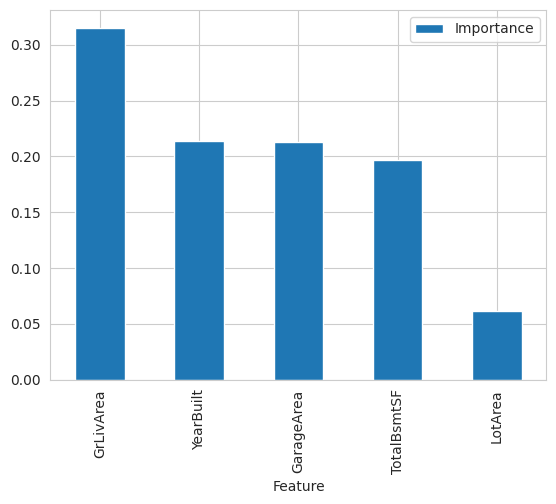

In [86]:
df_feature_importance.plot(kind='bar',x='Feature',y='Importance')
plt.savefig(f'{file_path}/features_importance.png', bbox_inches='tight')

---